In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv(r'E:/Machine Learning Project/Diabetes Classification conbine ML,NN/Data/diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
# Replacing missing values ('NaN') in 'smoking_history' with 'never'
df['smoking_history'] = df['smoking_history'].fillna('never')

# Checking unique values in 'smoking_history' before encoding
print(df['smoking_history'].unique())

['never' 'No Info' 'current' 'former' 'ever' 'not current']


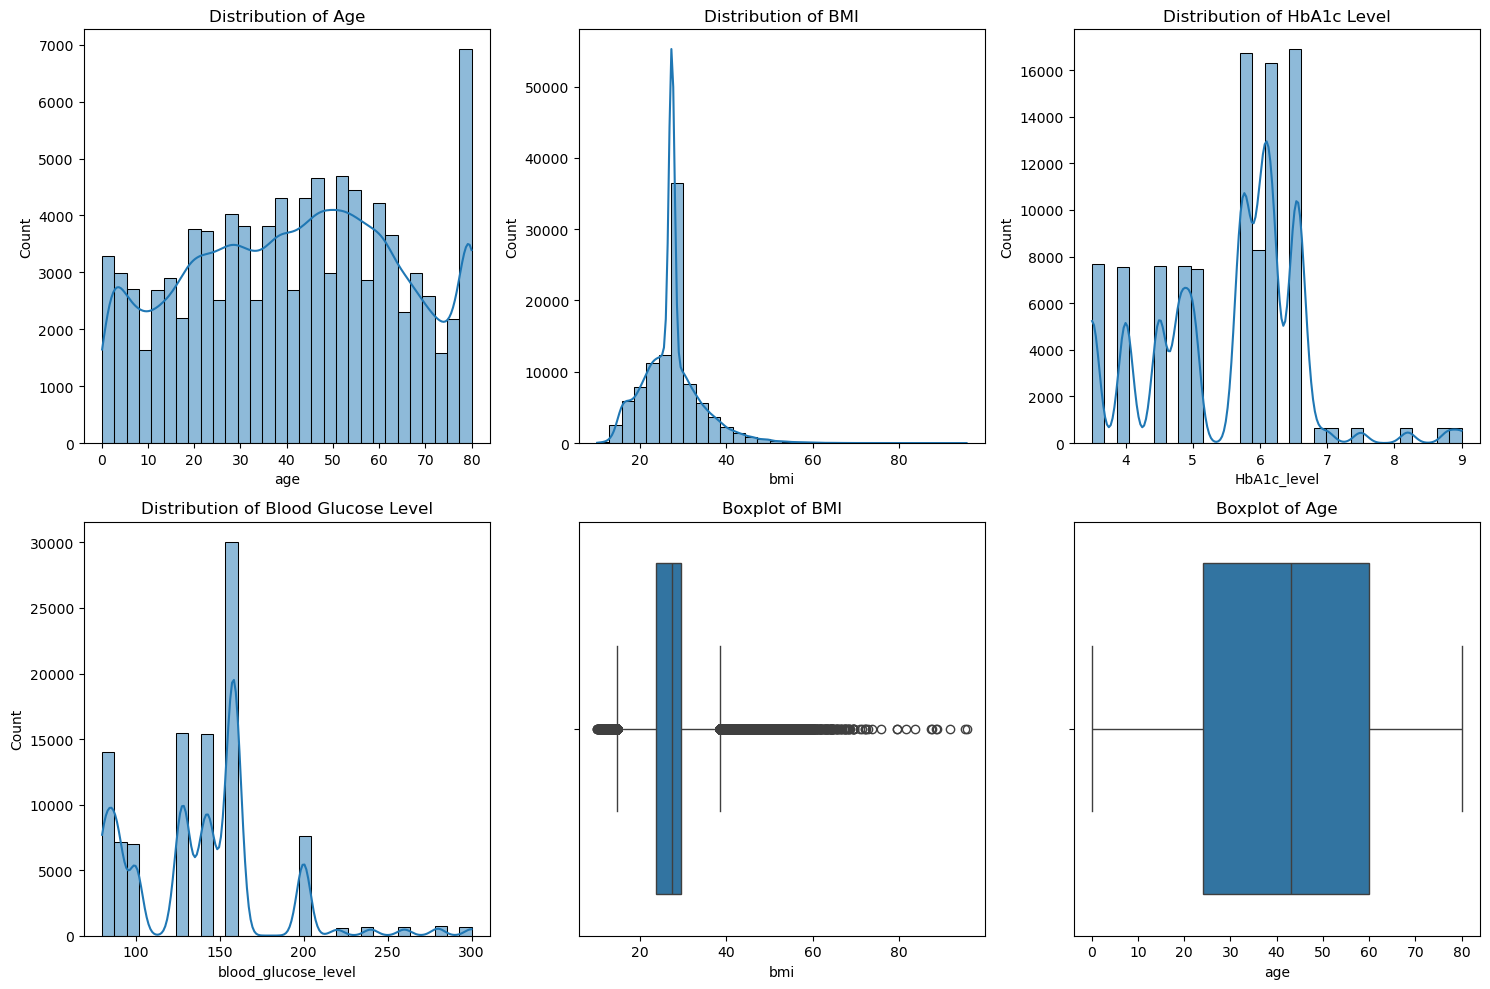

In [8]:
# Plotting the distributions of numerical features
plt.figure(figsize=(15, 10))

# Histogram for 'age'
plt.subplot(2, 3, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')

# Histogram for 'bmi'
plt.subplot(2, 3, 2)
sns.histplot(df['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')

# Histogram for 'HbA1c_level'
plt.subplot(2, 3, 3)
sns.histplot(df['HbA1c_level'], bins=30, kde=True)
plt.title('Distribution of HbA1c Level')

# Histogram for 'blood_glucose_level'
plt.subplot(2, 3, 4)
sns.histplot(df['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribution of Blood Glucose Level')

# Boxplot for 'bmi'
plt.subplot(2, 3, 5)
sns.boxplot(x=df['bmi'])
plt.title('Boxplot of BMI')

# Boxplot for 'age'
plt.subplot(2, 3, 6)
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')

# Displaying the plots
plt.tight_layout()
plt.show()


C:\Users\erfan\AppData\Local\Temp\ipykernel_11664\738011499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette="Set2")


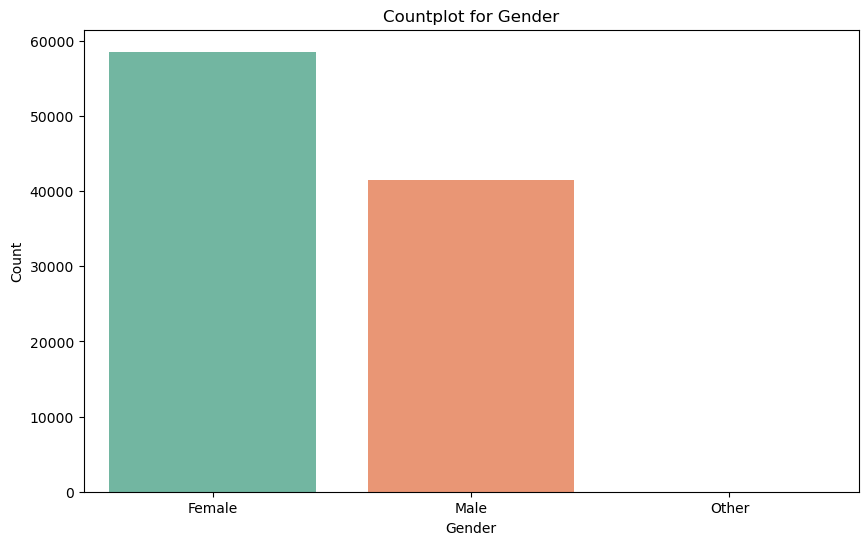

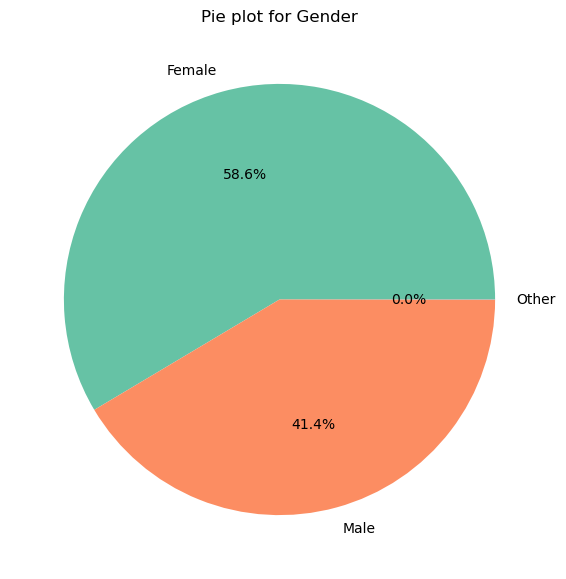

In [9]:
# Countplot for 'gender'
plt.figure(figsize=(10,6))
sns.countplot(x='gender', data=df, palette="Set2")
plt.title('Countplot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Pie chart for 'gender'
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(gender_counts)))
plt.title('Pie plot for Gender')
plt.show()


C:\Users\erfan\AppData\Local\Temp\ipykernel_11664\3690185703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df, palette="Set2")


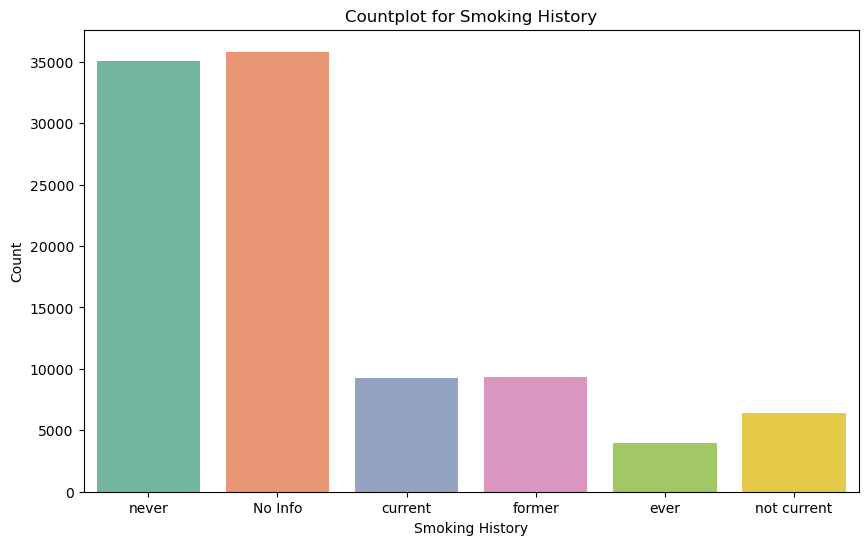

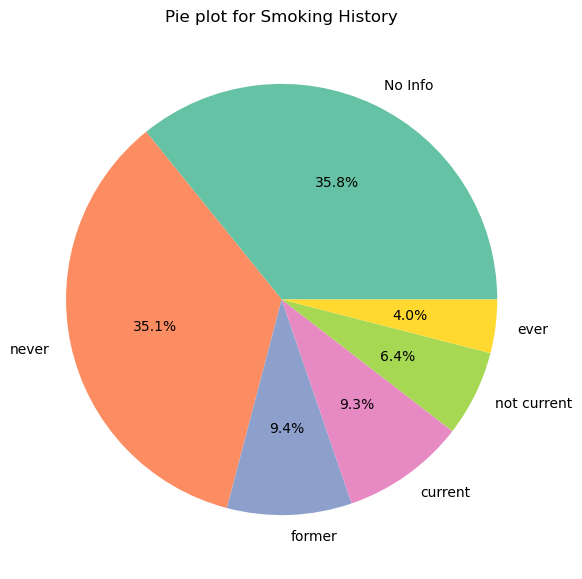

In [10]:
# Countplot for 'smoking_history'
plt.figure(figsize=(10,6))
sns.countplot(x='smoking_history', data=df, palette="Set2")
plt.title('Countplot for Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

# Pie chart for 'smoking_history'
smoking_counts = df['smoking_history'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(smoking_counts)))
plt.title('Pie plot for Smoking History')
plt.show()


C:\Users\erfan\AppData\Local\Temp\ipykernel_11664\3080880829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette="Set2")


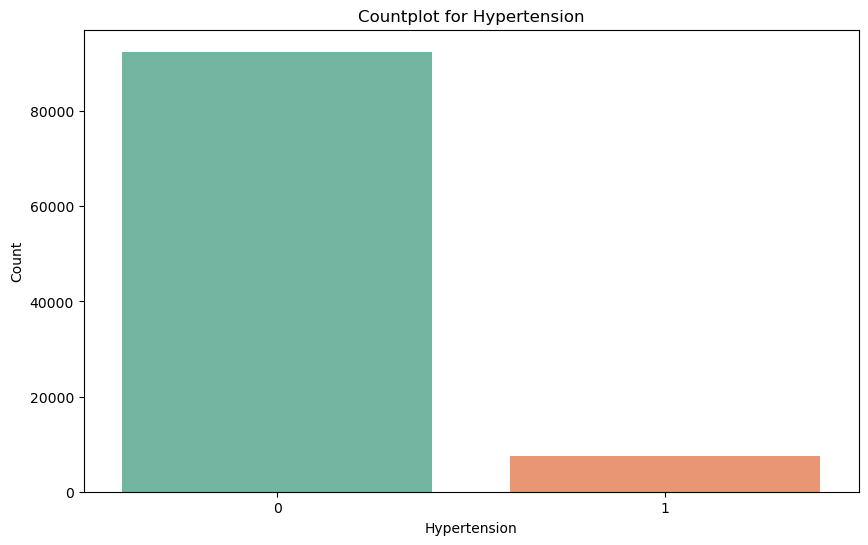

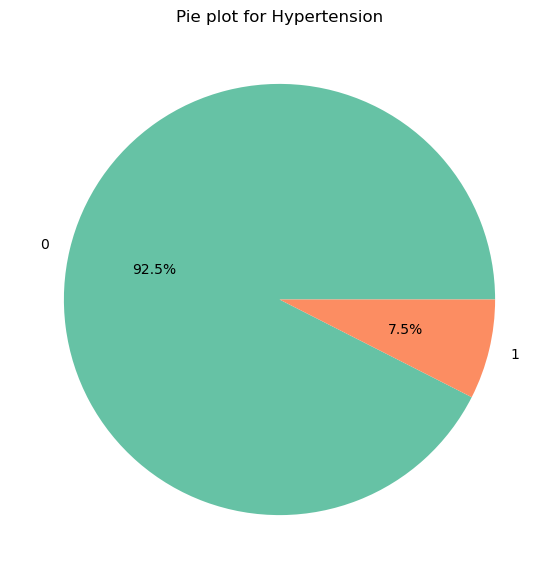

In [11]:
# Countplot for 'hypertension'
plt.figure(figsize=(10,6))
sns.countplot(x='hypertension', data=df, palette="Set2")
plt.title('Countplot for Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# Pie chart for 'hypertension'
hypertension_counts = df['hypertension'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(hypertension_counts, labels=hypertension_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(hypertension_counts)))
plt.title('Pie plot for Hypertension')
plt.show()


C:\Users\erfan\AppData\Local\Temp\ipykernel_11664\671511466.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette="Set2")


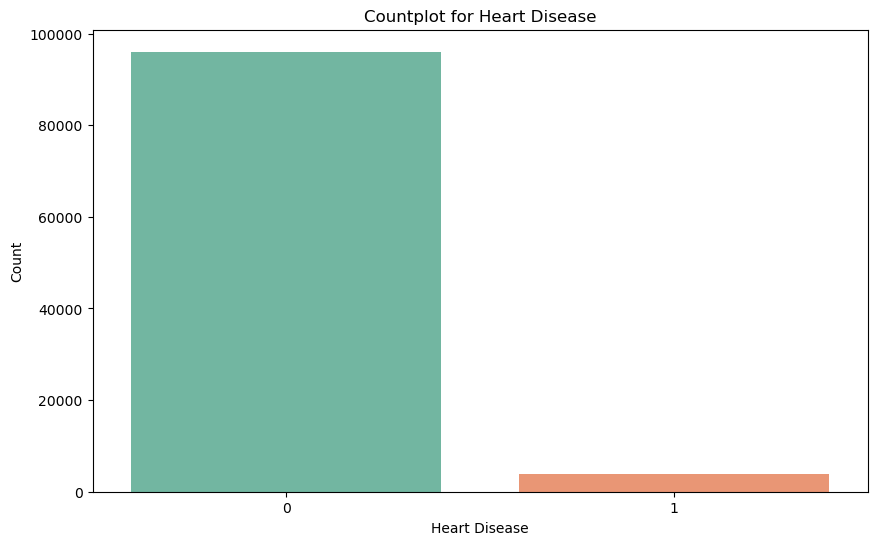

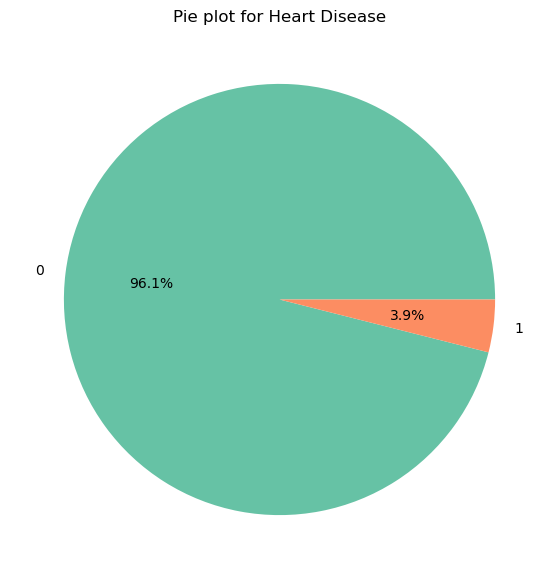

In [12]:
# Countplot for 'heart_disease'
plt.figure(figsize=(10,6))
sns.countplot(x='heart_disease', data=df, palette="Set2")
plt.title('Countplot for Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Pie chart for 'heart_disease'
heart_disease_counts = df['heart_disease'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(heart_disease_counts)))
plt.title('Pie plot for Heart Disease')
plt.show()


C:\Users\erfan\AppData\Local\Temp\ipykernel_11664\139286921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette="Set2")


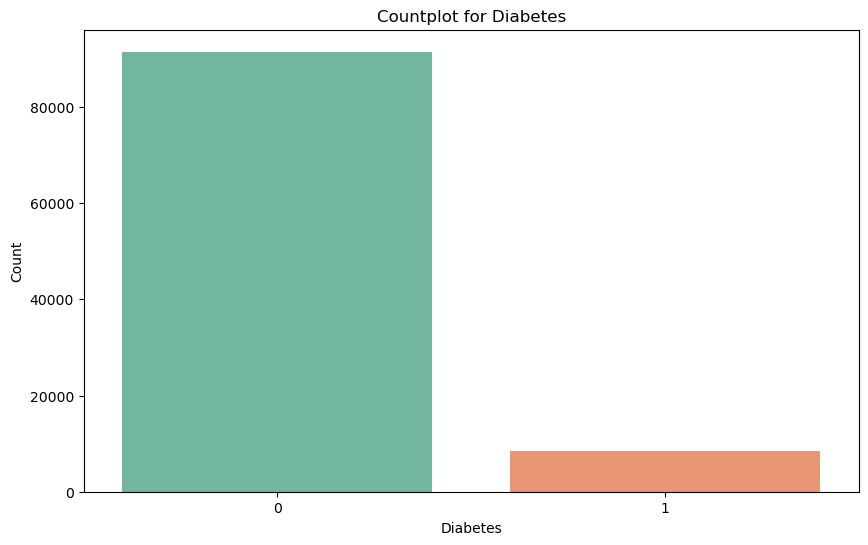

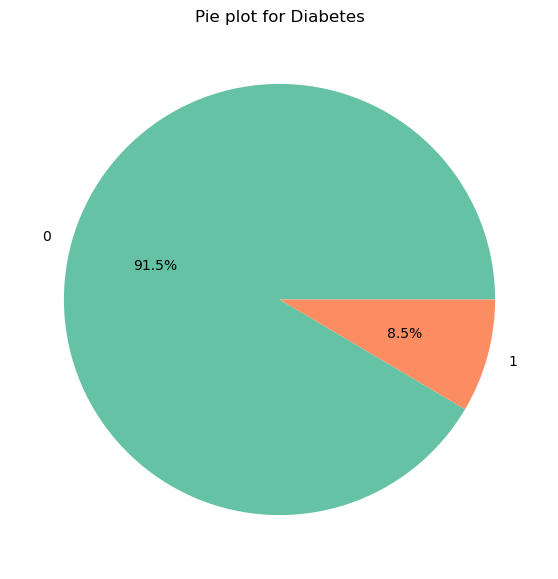

In [13]:
# Countplot for 'diabetes'
plt.figure(figsize=(10,6))
sns.countplot(x='diabetes', data=df, palette="Set2")
plt.title('Countplot for Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Pie chart for 'diabetes'
diabetes_counts = df['diabetes'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(diabetes_counts)))
plt.title('Pie plot for Diabetes')
plt.show()


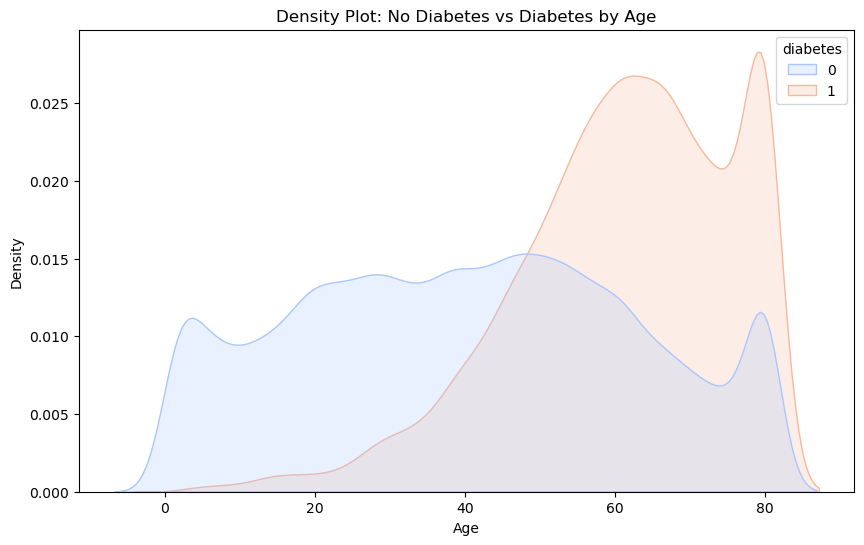

In [14]:
# Plotting the density plot for 'age' by 'diabetes' group
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="age", hue="diabetes", fill=True, common_norm=False, palette="coolwarm")
plt.title('Density Plot: No Diabetes vs Diabetes by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


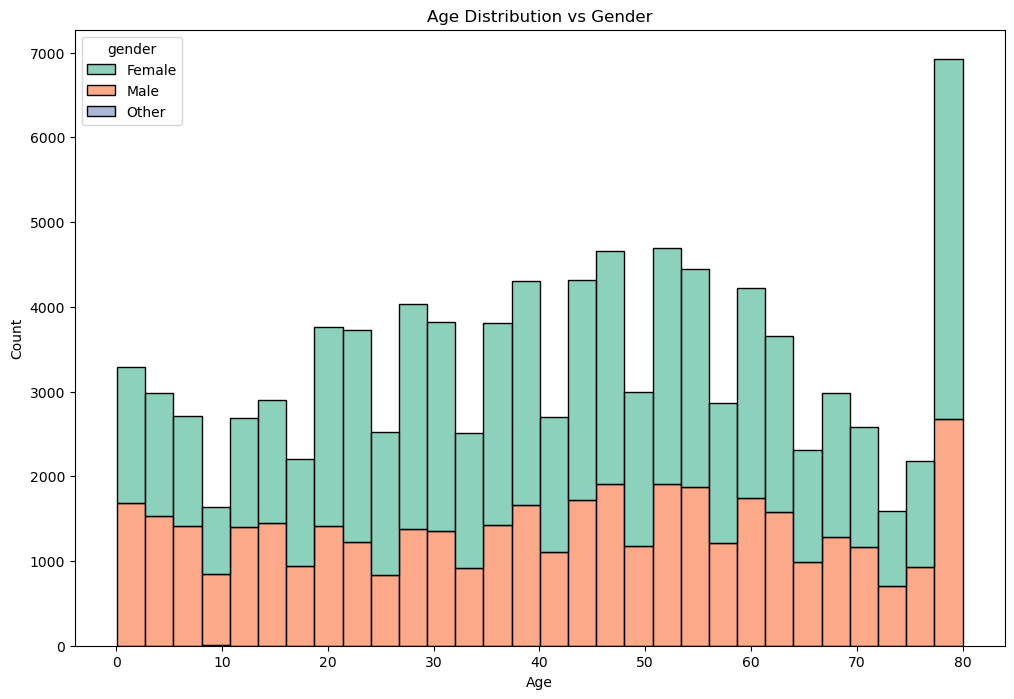

In [15]:
# Age distribution by Gender
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="gender", multiple="stack", bins=30, palette="Set2")
plt.title('Age Distribution vs Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


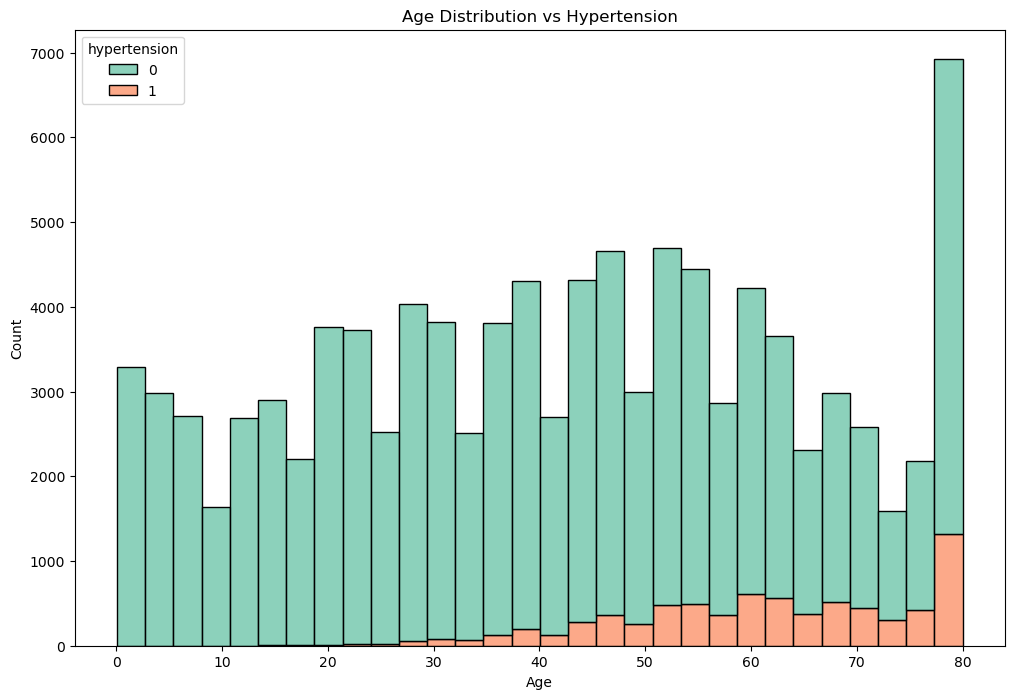

In [16]:
# Age distribution by Hypertension
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="hypertension", multiple="stack", bins=30, palette="Set2")
plt.title('Age Distribution vs Hypertension')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


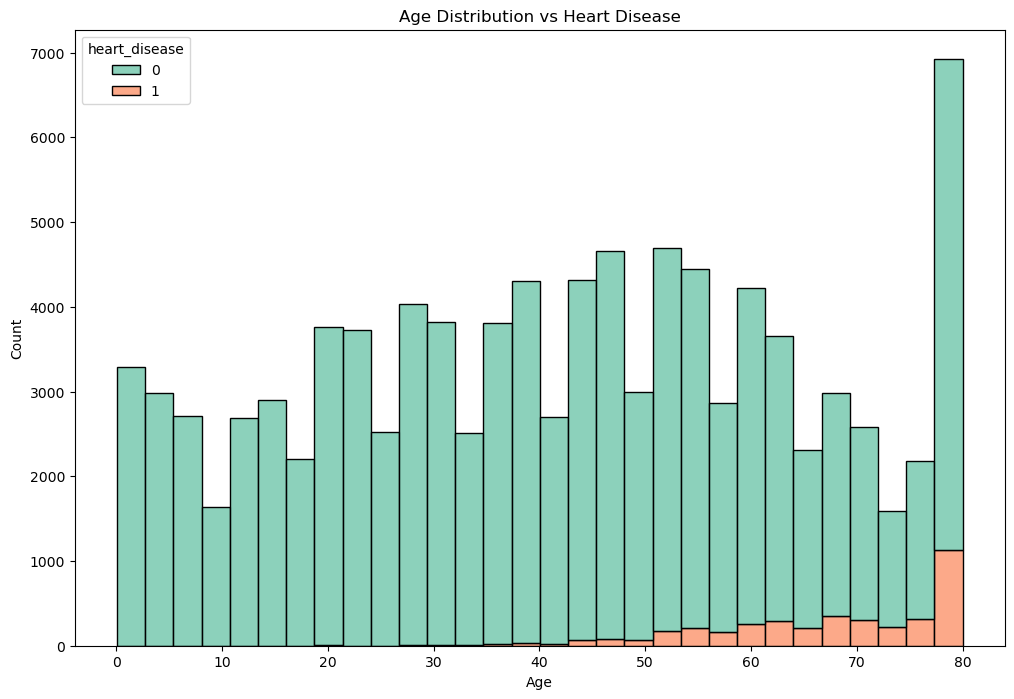

In [17]:
# Age distribution by Heart Disease
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="heart_disease", multiple="stack", bins=30, palette="Set2")
plt.title('Age Distribution vs Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


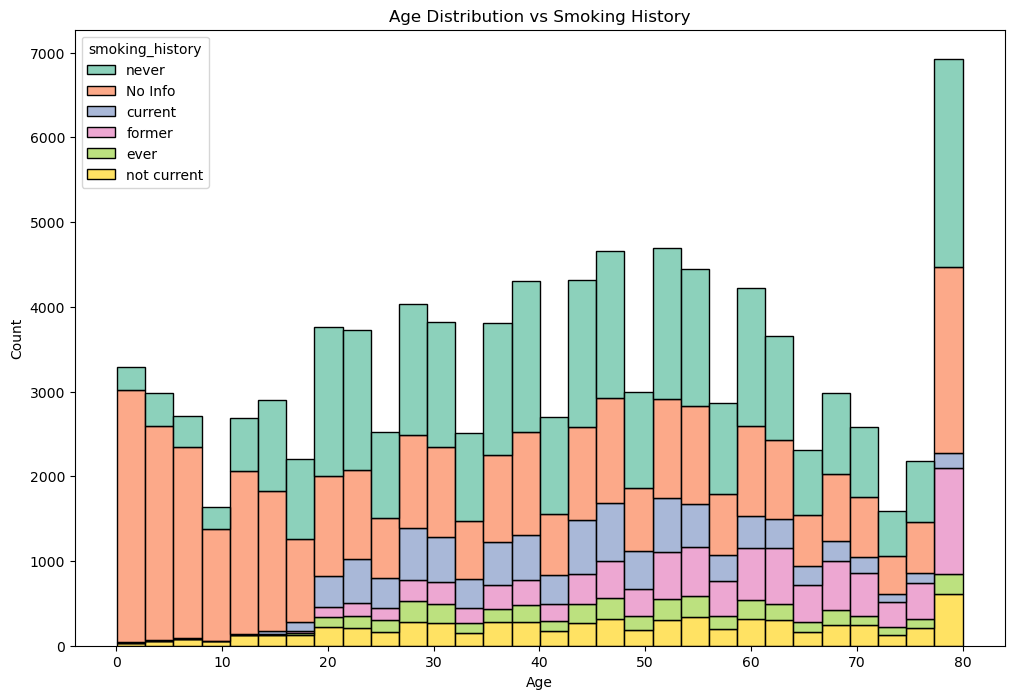

In [18]:
# Age distribution by Smoking History
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="smoking_history", multiple="stack", bins=30, palette="Set2")
plt.title('Age Distribution vs Smoking History')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


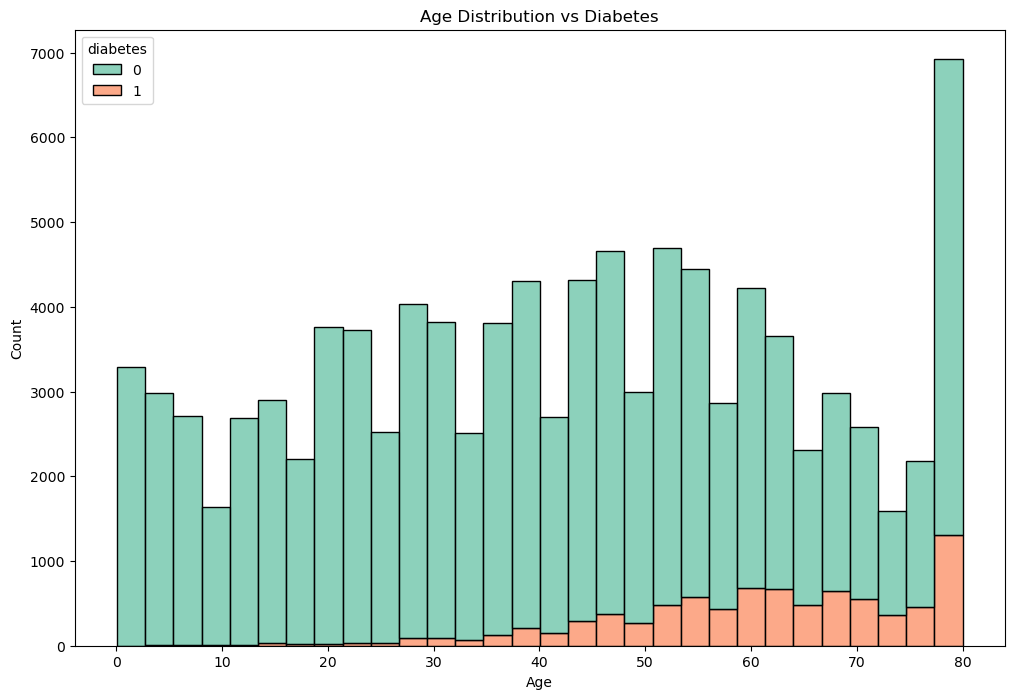

In [19]:
# Age distribution by Diabetes
plt.figure(figsize=(12,8))
sns.histplot(data=df, x="age", hue="diabetes", multiple="stack", bins=30, palette="Set2")
plt.title('Age Distribution vs Diabetes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [20]:
# Importing necessary library
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Converting 'gender' feature to numerical values
df['gender'] = le.fit_transform(df['gender'])

# Converting 'smoking_history' feature to numerical values
# Replacing 'No Info' with 'never' before encoding
df['smoking_history'] = le.fit_transform(df['smoking_history'].replace('No Info', 'never'))

# Replacing unwanted categories with 'Male' or 'Female'
df['gender'] = df['gender'].replace(['Other'], 'Female') 

# Displaying the changes in the dataset
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0


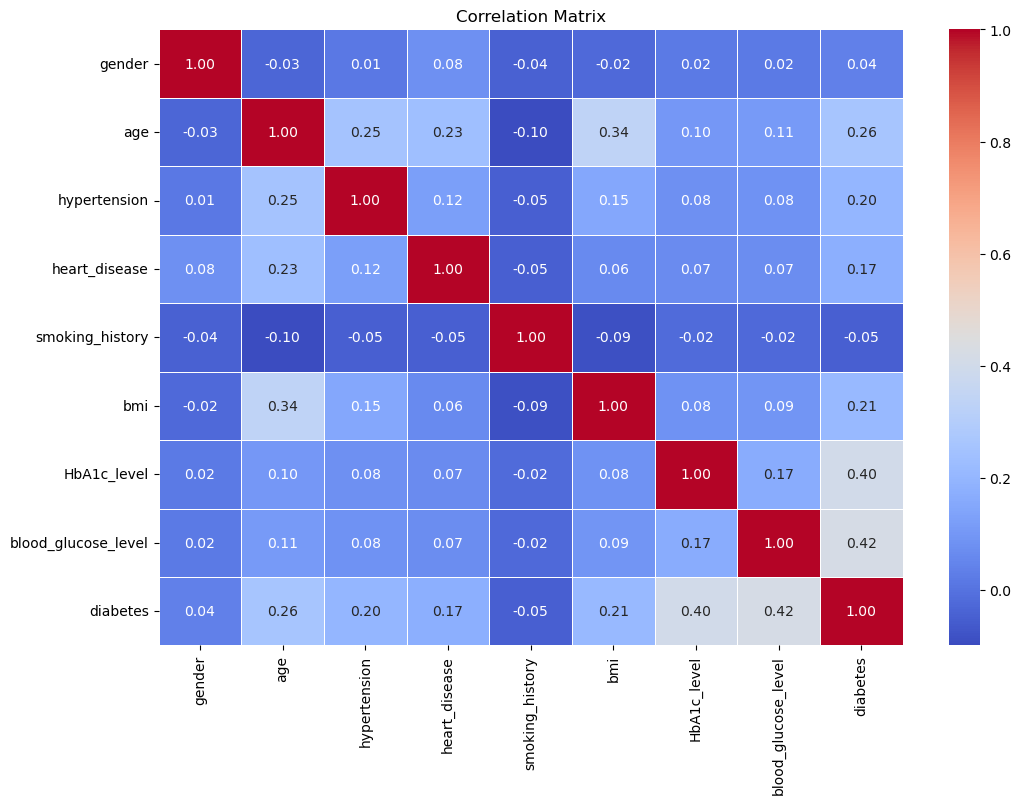

In [21]:
# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features like 'age', 'bmi', 'HbA1c_level', 'blood_glucose_level'
scaler = StandardScaler()

df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(df[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)  # Features
y = df['diabetes']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the SVM model
svm = SVC()

# Training the model
svm.fit(X_train, y_train)

# Predicting on the test set
y_pred_svm = svm.predict(X_test)

# Evaluating the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print("SVM Accuracy:", accuracy_svm)
print("Confusion Matrix:\n", cm_svm)
print("Classification Report:\n", report_svm)

SVM Accuracy: 0.96275
Confusion Matrix:
 [[18243     8]
 [  737  1012]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18251
           1       0.99      0.58      0.73      1749

    accuracy                           0.96     20000
   macro avg       0.98      0.79      0.86     20000
weighted avg       0.96      0.96      0.96     20000



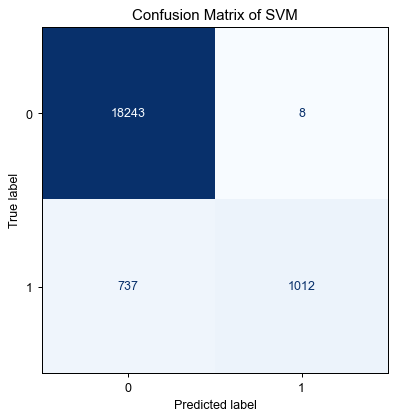

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Example for SVM
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for SVM
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of SVM')
plt.grid(False)  # Hide grid lines
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Predicting on the test set
y_pred_rf = rf.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", cm_rf)
print("Classification Report:\n", report_rf)

Random Forest Accuracy: 0.968
Confusion Matrix:
 [[18176    75]
 [  565  1184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18251
           1       0.94      0.68      0.79      1749

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.88     20000
weighted avg       0.97      0.97      0.97     20000



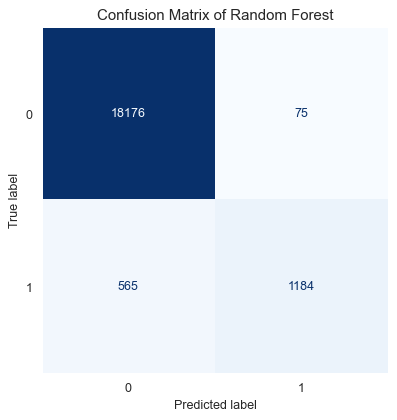

In [27]:
# Example for Random Forest
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Random Forest')
plt.grid(False)
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Training the model
dt.fit(X_train, y_train)

# Predicting on the test set
y_pred_dt = dt.predict(X_test)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", cm_dt)
print("Classification Report:\n", report_dt)


Decision Tree Accuracy: 0.95025
Confusion Matrix:
 [[17743   508]
 [  487  1262]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97     18251
           1       0.71      0.72      0.72      1749

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.84     20000
weighted avg       0.95      0.95      0.95     20000



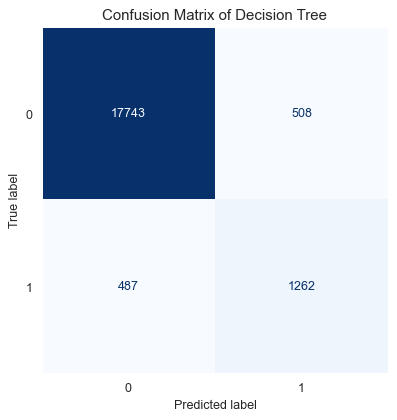

In [29]:
# Example for Decision Tree
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree')
plt.grid(False)
plt.show()


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the Logistic Regression model
lr = LogisticRegression(max_iter=1000)

# Training the model
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred_lr = lr.predict(X_test)

# Evaluating the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", cm_lr)
print("Classification Report:\n", report_lr)


Logistic Regression Accuracy: 0.95795
Confusion Matrix:
 [[18079   172]
 [  669  1080]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18251
           1       0.86      0.62      0.72      1749

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.95     20000



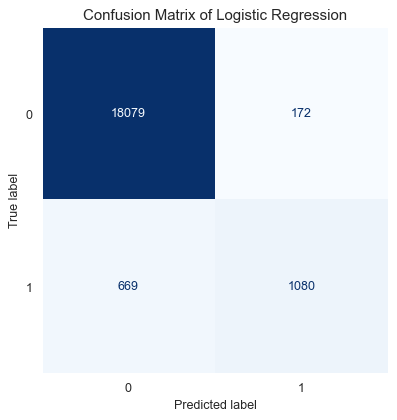

In [31]:
# Example for Logistic Regression
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Logistic Regression')
plt.grid(False)
plt.show()


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the KNN model
knn = KNeighborsClassifier()

# Training the model
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn.predict(X_test)

# Evaluating the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy:", accuracy_knn)
print("Confusion Matrix:\n", cm_knn)
print("Classification Report:\n", report_knn)


KNN Accuracy: 0.9597
Confusion Matrix:
 [[18123   128]
 [  678  1071]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     18251
           1       0.89      0.61      0.73      1749

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



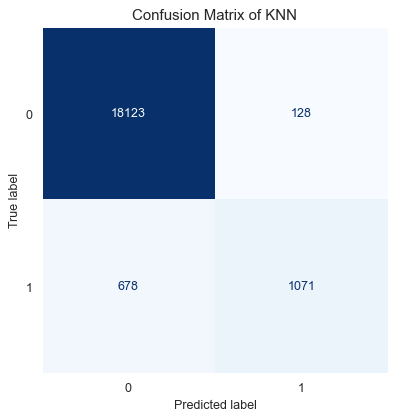

In [33]:
# Example for KNN
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for KNN
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, ax=ax, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of KNN')
plt.grid(False)
plt.show()


Now it's the turn of algorithm *NN*

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initializing the NN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # ReLU for non-linearity

# Second hidden layer
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification (diabetes: yes/no)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


h:\Users\erfan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 897us/step - accuracy: 0.9523 - loss: 0.1398 - val_accuracy: 0.9676 - val_loss: 0.0958
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.9691 - loss: 0.0920 - val_accuracy: 0.9681 - val_loss: 0.0936
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.9701 - loss: 0.0877 - val_accuracy: 0.9703 - val_loss: 0.0857
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 824us/step - accuracy: 0.9723 - loss: 0.0801 - val_accuracy: 0.9711 - val_loss: 0.0837
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 813us/step - accuracy: 0.9721 - loss: 0.0810 - val_accuracy: 0.9709 - val_loss: 0.0839
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 836us/step - accuracy: 0.9723 - loss: 0.0818 - val_accuracy: 0.9706 - val_loss: 0.0844
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.9717 - loss: 0.0827 - val_accuracy: 0.9709 - val_loss: 0.0829
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.9712 -

In [36]:
# Evaluating the model on the test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")  

# Evaluating the model performance
accuracy_nn = accuracy_score(y_test, y_pred_nn)
cm_nn = confusion_matrix(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn)

print("Neural Network Accuracy:", accuracy_nn)
print("Confusion Matrix:\n", cm_nn)
print("Classification Report:\n", report_nn)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step
Neural Network Accuracy: 0.97
Confusion Matrix:
 [[18236    15]
 [  585  1164]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18251
           1       0.99      0.67      0.80      1749

    accuracy                           0.97     20000
   macro avg       0.98      0.83      0.89     20000
weighted avg       0.97      0.97      0.97     20000



625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step


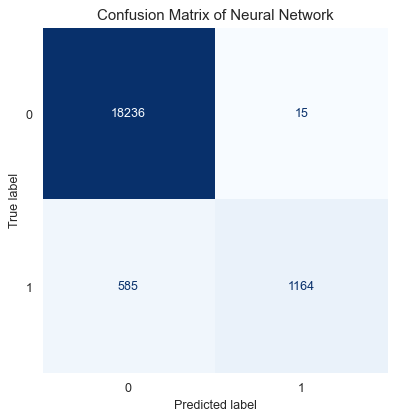

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting on the test set for Neural Network
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")  

# Calculating the confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Plotting the confusion matrix
fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
sns.set_style('darkgrid')

# Display confusion matrix for Neural Network (NN)
ConfusionMatrixDisplay(confusion_matrix=cm_nn).plot(ax=ax, colorbar=False, cmap='Blues')

# Adding title and adjusting layout
plt.title('Confusion Matrix of Neural Network')
plt.grid(False)  
plt.show()


Combination of ML and DL

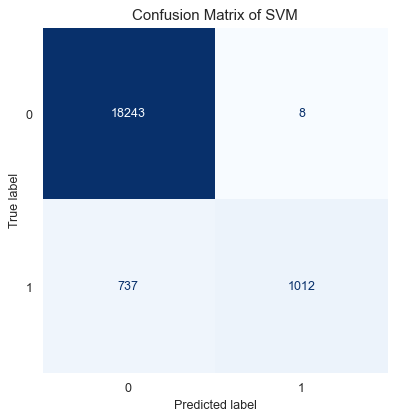

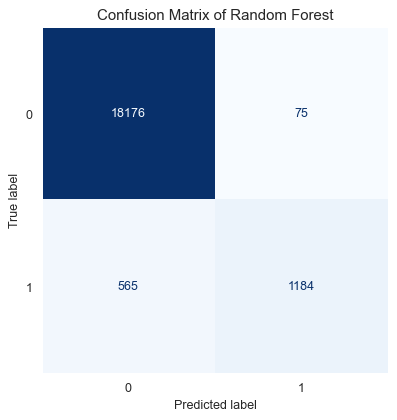

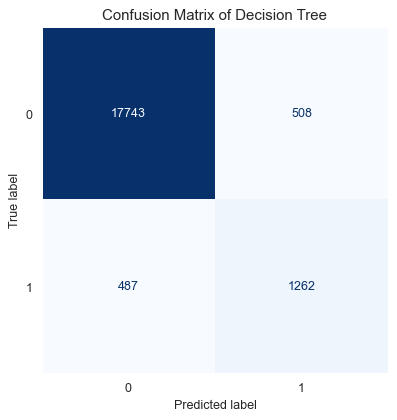

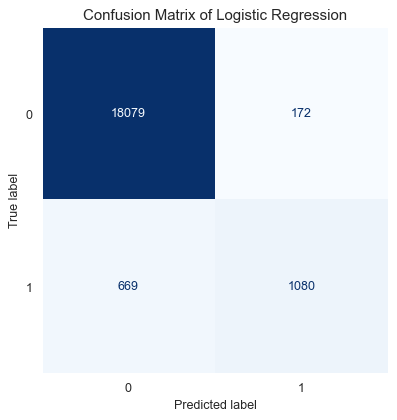

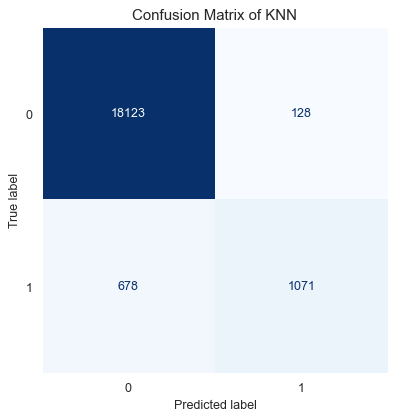

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 692us/step - accuracy: 0.9726 - loss: 0.0801
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


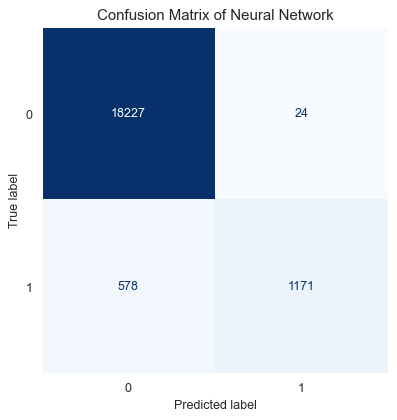

Model Comparison (Accuracy):
Neural Network: 0.9699
Random Forest: 0.9680
SVM: 0.9627
KNN: 0.9597
Logistic Regression: 0.9579
Decision Tree: 0.9503


In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns


models = [
    ('SVM', svm),
    ('Random Forest', rf),
    ('Decision Tree', dt),
    ('Logistic Regression', lr),
    ('KNN', knn),
    ('Neural Network', model)
]

accuracies = []
conf_matrices = []

# Loop through each model to evaluate
for name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test) if name != 'Neural Network' else (model.predict(X_test) > 0.5).astype("int32")
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    # Append results
    accuracies.append((name, accuracy))
    conf_matrices.append((name, cm))
    
    # Display the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 5), dpi=90)
    sns.set_style('darkgrid')
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(ax=ax, colorbar=False, cmap='Blues')
    plt.title(f'Confusion Matrix of {name}')
    plt.grid(False)  # Hide grid lines
    plt.show()

# Sorting the models based on accuracy
accuracies.sort(key=lambda x: x[1], reverse=True)

# Displaying the accuracy comparison
print("Model Comparison (Accuracy):")
for name, accuracy in accuracies:
    print(f"{name}: {accuracy:.4f}")
